In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Input,Activation,Dense,Flatten,Conv2D,MaxPooling2D,Dropout,AveragePooling2D,BatchNormalization,SeparableConv2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [17]:
dataset_path = '/content/drive/MyDrive/data1/'
class_names = ['with_mask', 'without_mask']

# apply glob module to retrieve files/pathnames  

mask_path = os.path.join(dataset_path, class_names[0], '*')
mask_path = glob.glob(mask_path)

nomask_path = os.path.join(dataset_path, class_names[1], '*')
nomask_path = glob.glob(nomask_path)

print(mask_path[4])

/content/drive/MyDrive/data1/with_mask/augmented_image_85.jpg


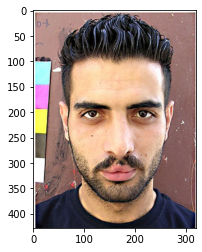

In [21]:
image = io.imread(nomask_path[600])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [22]:
import cv2
import numpy as np

withmask=[]

for i in range(len(mask_path)):
  arr= cv2.imread(mask_path[i])
  arr = cv2.resize(arr,(100,100))                 #resize images to 100*100 pixels
  gray = cv2.cvtColor(arr,cv2.COLOR_BGR2GRAY)     #convvert into gray image
  withmask.append(gray)
   
    
withoutmask=[]

for i in range(len(nomask_path)):
    arr= cv2.imread(nomask_path[i])
    arr = cv2.resize(arr,(100,100))
    gray = cv2.cvtColor(arr,cv2.COLOR_BGR2GRAY)
    withoutmask.append(gray)
    

xtrain = []
ytrain = []

for i in range(len(mask_path)):       
  xtrain.append(withmask[i])        
  ytrain.append(1)
  #ytrain.append(0)


for j in range(len(nomask_path)):
  xtrain.append(withoutmask[j])
  ytrain.append(0)

xtrain = np.array(xtrain)
xtrain = np.reshape(xtrain,(xtrain.shape[0],100,100,1))

ytrain = np.array(ytrain)


xtrain = xtrain/255   #Normalise the array




In [26]:
print(len(xtrain))

1474


In [74]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,kernel_size=(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(1,activation='sigmoid'))
#The Final layer with two outputs for two categories


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

In [75]:
adam = Adam(lr = 1e-3)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [89]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(xtrain,ytrain,test_size=0.2,random_state=1234,shuffle='True')


In [90]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=25,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/25
30/30 [==============================] - 4s 134ms/step - loss: 0.1749 - accuracy: 0.9512 - val_loss: 0.0899 - val_accuracy: 0.9661
Epoch 2/25
30/30 [==============================] - 4s 131ms/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0492 - val_accuracy: 0.9831
Epoch 3/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0293 - accuracy: 0.9894 - val_loss: 0.0608 - val_accuracy: 0.9788
Epoch 4/25
30/30 [==============================] - 3s 84ms/step - loss: 0.0298 - accuracy: 0.9894 - val_loss: 0.0718 - val_accuracy: 0.9788
Epoch 5/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.0576 - val_accuracy: 0.9831
Epoch 6/25
30/30 [==============================] - 2s 82ms/step - loss: 0.0110 - accuracy: 0.9958 - val_loss: 0.0580 - val_accuracy: 0.9788
Epoch 7/25
30/30 [==============================] - 2s 83ms/step - loss: 0.0178 - accuracy: 0.9947 - val_loss: 0.1154 - val_accuracy: 0.9661
Epoch 8/25


In [91]:
model.save('myymodel.h5')

In [92]:
def predictImage(img1):
    
    
   # plt.imshow(img1[:,:,0],cmap='gray')   #viewing grayscale images with dimension (row,col,1)
 
    Y = img1
    
    X = np.expand_dims(Y,axis=0)  #basically the transpose 
    val = model.predict(X)
    val=np.round(val)
    #if np.round(val) == 1:
        
        #plt.xlabel("Mask",fontsize=30)
        
    
    #elif np.round(val) == 0:
        
        #plt.xlabel("Nomask",fontsize=30)
    return val
    

In [93]:
ypred=np.zeros(len(test_data))

for i in range(len(test_data)):
  ypred[i]=(predictImage(test_data[i])[0])






In [94]:
import sklearn.metrics
import matplotlib.pyplot as plt
cm=sklearn.metrics.confusion_matrix(test_target,ypred)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/295
print(accuracy)  #test data accuracy


[[129   5]
 [  4 157]]
0.9694915254237289
